# **Energy consumption measurement using RAPL Report**

**Course:** Elective course: Energy Consumption E2025\
**Author:** Eray Erkul  
**Date:** 19 November 2025  

---

**In this assignment, I will analyze the energy consumption of the cpu and memory (DRAM) using stress-ng while getting powered by a programmable DC power supply.**

**References:**
Some markdowns and codes are used from the **"DataChunking_sigmark_RAPLcharacterization.ipynb"** and **"DataProcessing_template.ipynb"** on the moodle. 

My previous assignment, assignment 1.

Crucial. How Much Power Does Memory Use? Crucial, Micron Technology, Inc., 2024, https://www.crucial.in/support/articles-faq-memory/how-much-power-does-memory-use.

**"RAPL in Action: Experiences in Using RAPL for Power Measurements"** - [doi.org/10.1145/3177754](https://doi.org/10.1145/3177754).

**stress-ng - a tool to load and stress a computer system** - https://manpages.ubuntu.com/manpages/focal/man1/stress-ng.1.html

**"DETERMINATION OF SAMPLE SIZE AND SAMPLING METHODS IN APPLIED RESEARCH"** - DOI:10.24874/PES03.01.003.

Lastly **AI** was also used to give an overview of my project and if i had missed something from the requirements. Few code was used with AI and modified by me, to match with the needs i had. These places are noted as #AI as a comment next to the code.

## 1. Research questions and Hypothesis

## **1.1 Research Question**

**Overall Question:**  
Which software characteristic has the largest impact on energy consumption compared to CPU-intensive workloads?

**Precise Research Question:**  
Given equal execution time for both CPU and memory (DRAM), do DRAM‑intensive workloads use less energy than CPU‑bound workloads, even with frequent memory accesses?

---

### **1.2 Hypotheses** 


**For the energy consumption**<br>
**Null Hypothesis (H₀):**  
There is **no significant difference** in energy consumption between DRAM heavey workloads and CPU-bound workloads.

**Alternative Hypothesis (H₁):**  
There is a **significant difference** in energy consumption between DRAM heavey workloads and CPU-bound workloads.


**For the average power and payload**<br>
**Null Hypothesis (H₀):**  
There is **no significant difference** in average power and payload consumption between DRAM heavey workloads and CPU-bound workloads.

**Alternative Hypothesis (H₁):**  
There is a **significant difference** in average power and payload consumption between DRAM heavey workloads and CPU-bound workloads.

To whether reject or not the null hypothesis, I will perform statistical tests. These tests will show whether my data is normally distributed or not. If the data is normally distributed, I can use a Levene’s test, t-test, and ANOVA to decide whether to reject the null hypothesis. If the data is not normally distributed, I can perform a permutation test instead.

---

### **1.3 Variables**
**Independent variable:**  
The independent variable in this experiment is the stress tests for CPU and memory (DRAM).

**Dependent variable:**  
The dependent variable is the energy consumption that CPU and memory use during the test and is measured by using RAPL. 

**Choice of Dependent Variables:**
CPU and Memory (DRAM) were chosen for testing because the CPU is mandatory, and memory plays an important role when executing programs. DRAM stores data temporarily while programs are running, meaning it is constantly in use. DRAM speed varies depending on its generation; for example, DDR5 offers clock speeds ranging from approximately 4800 MT/s to 7000 MT/s. Despite its high speed, DRAM generally consumes small amount of energy.

**Controlled variables:**
All tests are conducted under the following controlled conditions:
- Hardware: All test PCs use identical hardwares.
- Operating system: All PCs run the same Linux and version (Ubuntu Server 24.04 LTS).
- All executions were run at 20 seconds while had a pause every 10 seconds.
- Power and services: This test, all PCs is connected to a programmable DC Power Supply and all background services are disabled to get a stable result.
- Cooling and environment: Tests are done at similar device temperatures, on the same surface, and under similar surrounding conditions.

---

## **2. Methodology**

This experiment measures the energy consumption of CPU-intensive and memory-intensive (DRAM) workloads using a programmable DC power supply (SPD3303X-E by Siglent), which provides accurate external measurements of the laptop's energy usage. The stress-ng tool was used to generate different tests that place heavy loads on the CPU and memory. The memory test code was adjusted to follow the same structure as the CPU tests. The laptop under test was powered directly by the programmable DC supply.

**Experimental setup:**
The experiment was performed on a Dell Latitude laptop with the following specifications:
- Intel® Core™ i5-8350U @ 1.70GHz
- System Memory: between 15 and 16 GB RAM
- Storage: between 436-500+ GB NVME.

Most background services were disabled during the stress tests, although the dbus service could not be turned off.

The laptop was powered by a programmable DC power supply (model: SPD3303X-E by Siglent). After connecting the laptop to the power supply (into channel 2 (CH2) in my case), the tests were run.

A total of 35 experiments were done, with a 10-second pause between each run. The number of experiments was limited to 35 due to time constraints.


**Controlled Setup:**
A controlled setup was not implemented in this experiment. The reason is that all tests were performed under the same stress conditions, and not in an idle condition.



<div style="display: flex; gap: 10px;"> #AI was used here to add multiple images next to eachother in markdown. Adding the src, alt and width "values" was by me

  <img src="../Images/PCPS-LowWatt.png" alt="PCPS-LowWatt" width="700">
  <img src="../Images/PCPS-HighWatt.png" alt="PCPS-HighWatt" width="700">

</div>

The raw data needs to be chunked to make it easier to process and analyze.

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.pyplot as plt
import os
import csv, json
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import normaltest
from scipy.stats import shapiro

In [240]:
ls RawData

 Volume in drive C has no label.
 Volume Serial Number is F6D7-DE80

 Directory of c:\Users\eray2\Documents\Github\semester3\Energy-Consumption-2025\Assignment 2\RawData

01-11-2025  18:55    <DIR>          .
19-11-2025  03:00    <DIR>          ..
01-11-2025  19:15    <DIR>          Test
               0 File(s)              0 bytes
               3 Dir(s)  2.056.956.956.672 bytes free


In [239]:
ls ChunkedData\\

 Volume in drive C has no label.
 Volume Serial Number is F6D7-DE80

 Directory of c:\Users\eray2\Documents\Github\semester3\Energy-Consumption-2025\Assignment 2\ChunkedData

02-11-2025  15:24    <DIR>          .
19-11-2025  03:00    <DIR>          ..
02-11-2025  15:24            51.359 DK1081249_cpu_1761814012683_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            51.007 DK1081249_cpu_1761814042924_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            58.863 DK1081249_cpu_1761814073319_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            55.481 DK1081249_cpu_1761814103616_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            58.082 DK1081249_cpu_1761814133855_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            56.295 DK1081249_cpu_1761814164131_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24            54.505 DK1081249_cpu_1761814194510_Eray_siglent_cpu.1761815289655.CH2.csv
02-11-2025  15:24          

In [ ]:
input_directory = 'RawData'
output_directory = 'ChunkedData\\'

In [4]:
os.listdir(input_directory)
onlydir = [f for f in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, f))]
onlyfiles = [f for f in os.listdir(input_directory) if os.path.isfile(os.path.join(input_directory, f))]

In [96]:
onlydir

['Test']

In [97]:
def parse_csv_line(line: str):
    # csv.reader handles the quoted JSON payload with doubled quotes
    return next(csv.reader([line], delimiter=',', quotechar='"', doublequote=True))

In [98]:
def is_json(perhaps_json):
  try:
    json.loads(perhaps_json)
  except ValueError as e:
    return False
  return True

In [99]:
dfs_list = []

dirs = [f for f in os.listdir(input_directory) if os.path.isdir(os.path.join(input_directory, f))]

for directory in dirs:
    for input_file in os.listdir(input_directory+'/'+directory):
        file_path = input_directory+'/'+directory+'/'
        file_name = os.path.basename(input_file)
        save_lines = False
        if file_name.endswith('.csv'):
            with open(file_path+file_name) as f:
                for line in f:
                # Do something with 'line'        
                #line = msg_line
                    
                    row =  parse_csv_line(line)
                    if row[2] == 'MESSAGE': 
                        row_dict = json.loads(row[3])
                        if is_json(row_dict['message']):
                            message = json.load(row_dict['message'])
                        else:
                            message_list = row_dict['message'].split(',')
                            message = {}
                            # sh post_to_sigless.sh 192.168.50.101:8000 CH1 "stop,<computerID>,<class>"
                            message['action'] = message_list[0]
                            message['computerID'] = message_list[1]
                            message['class'] = message_list[2]
                            
                        print(message)
                        
                        if message['action'] =='start':
                            start_time = row_dict['timestamp']
                            message_values = list(message.values())+[str(start_time)]
                            file_addition = '_'.join(message_values[1:])
                            #print(file_addition)
                            outputfile = output_directory+file_addition+'_'+file_name
                            # Add information from message
                            message.pop('action')
                            start_row = message
                            start_row['start_time'] = start_time
                            start_row['channelId'] =  row_dict['channelId']
                            
                            if(not(save_lines)):
                                f_out = open(outputfile, "w")   # 'r' for reading and 'w' for writing                       
                                save_lines = True
                            else:
                                print(outputfile)
                                f_out = open(outputfile, "w")
            
                        elif message['action'] == 'stop':
                            end_time = row_dict['timestamp']
                            duration = end_time - start_time
                            start_row['exp_duration'] = duration
                            print('meta_row=',start_row)
                            save_lines = False # No more lines for this flow  
                            f_out.close()   # Close output file
                            # save the meta data as the first two lines of the chunked CSV file
                            a = list(start_row.keys())
                            line1 = ','.join(a) 
                            a = list(start_row.values())
                            line2 = ','.join([str(s) for s in a])
                            with open(outputfile, 'r') as original:
                                data = original.read()
                            with open(outputfile, 'w') as modified:
                                modified.write(line1+"\n"+line2+"\n" + data)
                            
                                
                    elif row[2] == 'POWER' and save_lines:  
                        f_out.write(line)   # Write line into the file 



{'action': 'start', 'computerID': 'DK1081249', 'class': 'cpu'}
{'action': 'start', 'computerID': 'DK1081249', 'class': 'cpu'}
..\Data\ChunkedData\DK1081249_cpu_1761814012683_Eray_siglent_cpu.1761815289655.CH2.csv
{'action': 'stop', 'computerID': 'DK1081249', 'class': 'cpu'}
meta_row= {'computerID': 'DK1081249', 'class': 'cpu', 'start_time': 1761814012683, 'channelId': 'CH2', 'exp_duration': 20224}
{'action': 'start', 'computerID': 'DK1081249', 'class': 'cpu'}
{'action': 'stop', 'computerID': 'DK1081249', 'class': 'cpu'}
meta_row= {'computerID': 'DK1081249', 'class': 'cpu', 'start_time': 1761814042924, 'channelId': 'CH2', 'exp_duration': 20378}
{'action': 'start', 'computerID': 'DK1081249', 'class': 'cpu'}
{'action': 'stop', 'computerID': 'DK1081249', 'class': 'cpu'}
meta_row= {'computerID': 'DK1081249', 'class': 'cpu', 'start_time': 1761814073319, 'channelId': 'CH2', 'exp_duration': 20279}
{'action': 'start', 'computerID': 'DK1081249', 'class': 'cpu'}
{'action': 'stop', 'computerID': '

I needed a total of 70 files, with 35 tests from the CPU and 35 tests from the memory. However, I ended up with more files than expected. To fix this, I made modifications to the raw files and deleted some abnormal data from the chunked files.

For the CPU raw test, I removed abnormal data, meaning some of the data in the rawfile only had few results, for example <br>
- 1761815520810,CH2,MESSAGE,"{""channelId"":""CH2"",""message"":""start,DK1081249,memory"",""timestamp"":1761815520810}" <br>
- 1761815520812,CH2,POWER,7.22 <br>
- 1761815520823,CH2,POWER,7.22 <br>
- 1761815520824,CH2,MESSAGE,"{""channelId"":""CH2"",""message"":""stop,DK1081249,memory"",""timestamp"":1761815520824}". <br>

Afterwards in the chunked data, I deleted the first chunked data, because it did not contain the necessary fields such as computerID, class, start_time, channelId, and exp_duration, DK1081249, cpu,1761814012683, CH2, 20224

For the memory data, it was easier to remove abnormal entries directly from the chunked data. The first four chunked files either did not contain the necessary fields or only contained a few results and were therefore removed.

Now that the raw data have been chunked

In [241]:
ls Results\\

 Volume in drive C has no label.
 Volume Serial Number is F6D7-DE80

 Directory of c:\Users\eray2\Documents\Github\semester3\Energy-Consumption-2025\Assignment 2\Results

01-11-2025  19:32    <DIR>          .
19-11-2025  03:00    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  2.056.956.821.504 bytes free


In [245]:
input_directory = 'ChunkedData'
output_directory = 'Results\\'

In [246]:
#import all the CSV files

# (a) Read from row 3 and on into df and calculate energy consumption
# (b) Read the first two lines with meta data, add the calculated energy consumption and concat to the existing
ID = 0
list_of_metadataframes = []
list_of_dataframes = []
for input_file in os.listdir(input_directory):
    file_path = input_directory+'/'
    file_name = os.path.basename(input_file)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path+file_name,skiprows=2, names=['timestamp','channel','action','payload'])
        # print(file_path+file_name,df['timestamp'].dtypes)
        df['time'] = (df['timestamp']-df['timestamp'].min()) / 1000
        df['ID'] = ID
        x = df['time']
        y = df['payload']
        y_int = integrate.cumulative_trapezoid(y, x, initial=0)
        #plt.plot(x, y_int)
        #plt.plot(x,y)
        #plt.savefig('')
        #plt.show()
        energy = y_int[-1]
        df_main = pd.read_csv(file_path+file_name,nrows=1,header=0)
        df_main['duration']=df['time'].max() # in seconds
        df_main['energy']=energy  # in joules
        df_main['power_avg']= energy/df_main['duration'] # in Watt
        df_main['ID'] = ID
        # print(df_main)
        df['class']=df_main['class'][0]
        df['ID'] = ID
        list_of_metadataframes.append(df_main)
        list_of_dataframes.append(df)
        ID = ID + 1

#dfs = pd.concat(list_of_metadataframes)
#df_power = pd.concat(list_of_dataframes)


In [247]:
dfs = pd.concat(list_of_metadataframes)

In [248]:
dfs = dfs.sort_values(by='class')
dfs = dfs.reset_index(drop=True)
dfs

,computerID,class,start_time,channelId,exp_duration,duration,energy,power_avg,ID
0,DK1081249,cpu,1761814012683,CH2,20224,20.209,563.954440,27.906103,0
1,DK1081249,cpu,1761814618605,CH2,20349,20.337,569.102920,27.983622,20
2,DK1081249,cpu,1761814648970,CH2,20343,20.334,571.650060,28.113016,21
3,DK1081249,cpu,1761814679329,CH2,20297,20.284,567.010215,27.953570,22
4,DK1081249,cpu,1761814709643,CH2,20308,20.295,573.150320,28.240962,23
...,...,...,...,...,...,...,...,...,...
65,DK1081249,memory,1761815960315,CH2,23482,23.480,662.725770,28.225118,47
66,DK1081249,memory,1761815993814,CH2,23026,23.021,639.887735,27.795827,48
67,DK1081249,memory,1761816026857,CH2,23442,23.440,654.247250,27.911572,49
68,DK1081249,memory,1761816093054,CH2,22785,22.755,640.876565,28.164209,51


In [249]:
df_powers = pd.concat(list_of_dataframes)
df_powers = df_powers.reset_index(drop=True)
df_powers

,timestamp,channel,action,payload,time,ID,class
0,1761814012689,CH2,POWER,9.94,0.000,0,cpu
1,1761814012700,CH2,POWER,9.94,0.011,0,cpu
2,1761814012712,CH2,POWER,9.94,0.023,0,cpu
3,1761814012722,CH2,POWER,9.94,0.033,0,cpu
4,1761814012755,CH2,POWER,9.94,0.066,0,cpu
...,...,...,...,...,...,...,...
142510,1761816710152,CH2,POWER,28.47,23.328,69,memory
142511,1761816710160,CH2,POWER,28.47,23.336,69,memory
142512,1761816710169,CH2,POWER,28.47,23.345,69,memory
142513,1761816710180,CH2,POWER,28.47,23.356,69,memory


# Starting Evaluation

The above imports the chunked data and provides us with two dataframes:
- dfs which holds the energy data for all the test
- df_powers holds all the power measurements for all the tests

To determine whether to reject the hypothesis, I will base my analysis mainly on the features energy and power_avg from dfs, and payload from df_powers. I have included power_ang and payload because they give more information about how much power my laptop is using. 
- energy is the total energy consumption in Joules.
- power_avg is the average power during the experiment in Watts.
- payload is the Instantaneous power measurement in Watts.


### **Overview of data overall**

Firstly I will normalize the variables energy and power_avg.
During stress testing some experiments ran longer than others, and to make sure a fair comparison, the data will be normalize to a fixed suration of 20 seconds.

In [250]:
# Ai was used here i.e. AI helped to find a way to normalize energy consumption per 20 seconds.
dfs.loc[:, "energy"] = (dfs["energy"] / dfs["duration"]) * 20 
dfs.loc[:, "power_avg"] = (dfs["power_avg"] / dfs["duration"]) * 20
dfs.loc[:, "duration"] = (dfs["duration"] / dfs["duration"]) * 20

dfs

,computerID,class,start_time,channelId,exp_duration,duration,energy,power_avg,ID
0,DK1081249,cpu,1761814012683,CH2,20224,20.0,558.122064,27.617500,0
1,DK1081249,cpu,1761814618605,CH2,20349,20.0,559.672439,27.519911,20
2,DK1081249,cpu,1761814648970,CH2,20343,20.0,562.260313,27.651240,21
3,DK1081249,cpu,1761814679329,CH2,20297,20.0,559.071401,27.562187,22
4,DK1081249,cpu,1761814709643,CH2,20308,20.0,564.819236,27.830462,23
...,...,...,...,...,...,...,...,...,...
65,DK1081249,memory,1761815960315,CH2,23482,20.0,564.502359,24.041838,47
66,DK1081249,memory,1761815993814,CH2,23026,20.0,555.916541,24.148236,48
67,DK1081249,memory,1761816026857,CH2,23442,20.0,558.231442,23.815335,49
68,DK1081249,memory,1761816093054,CH2,22785,20.0,563.284171,24.754303,51


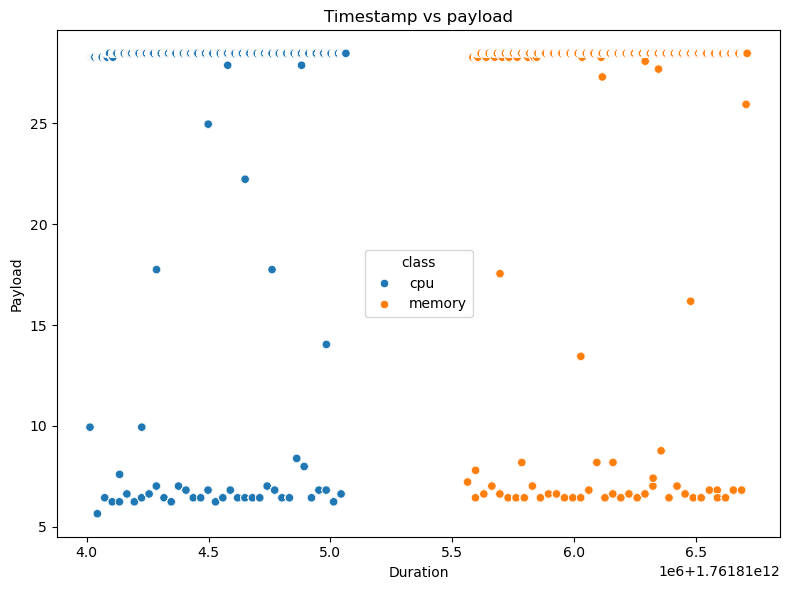

In [251]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df_powers, x='timestamp', y='payload', hue='class')
plt.title("Timestamp vs payload")
plt.xlabel("Duration")
plt.ylabel("Payload")

plt.tight_layout()
plt.show()

cpu runs for a shorter time than the memory.

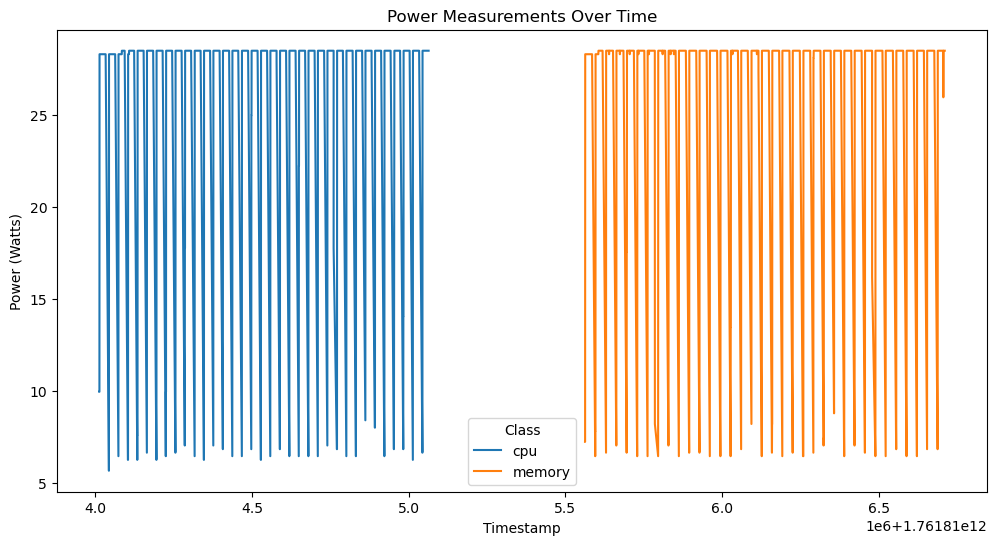

In [252]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_powers, x='timestamp', y='payload', hue='class')
plt.title("Power Measurements Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Power (Watts)")
plt.legend(title='Class')
plt.show()

The lineplot makes sense. when the stress test is running, there is  a clear peak in power usage, but when it goes into sleep mode, the power drops to a low level. This creates a pattern where the graph spikes up and then goes down again. The timing also looks consistent, since the 10-second sleep periods between each spike appear to have the same length throughout the graph.

In [253]:
power_avg_mean_cpu = dfs[dfs['class'] == 'cpu']['power_avg'].mean()
power_avg_mean_memory = dfs[dfs['class'] == 'memory']['power_avg'].mean()


energy_avg_mean_cpu = dfs[dfs['class'] == 'cpu']['energy'].mean()
energy_avg_mean_memory = dfs[dfs['class'] == 'memory']['energy'].mean()

payload_mean_cpu = df_powers[df_powers['class'] == 'cpu']['payload'].mean()
payload_mean_memory = df_powers[df_powers['class'] == 'memory']['payload'].mean()

print("Average Power (Watts) for CPU:", power_avg_mean_cpu)
print("Average Power (Watts) for Memory:", power_avg_mean_memory)
print("Average Energy (Joules) for CPU:", energy_avg_mean_cpu)
print("Average Energy (Joules) for Memory:", energy_avg_mean_memory)
print("Average Payload (Watts) for CPU:", payload_mean_cpu)
print("Average Payload (Watts) for Memory:", payload_mean_memory)


Average Power (Watts) for CPU: 27.694243206975997
Average Power (Watts) for Memory: 24.33596131171523
Average Energy (Joules) for CPU: 558.9861564192677
Average Energy (Joules) for Memory: 559.2126497585549
Average Payload (Watts) for CPU: 27.931989532767002
Average Payload (Watts) for Memory: 27.957934591030757


When comparing cpu and memory (DRAM) averages, the cpu shows higher average power consumption (27.69 W) compared to memory (24.34 W). However, the average energy consumption is slightly lower for the cpu (558.99 J) than for memory (559.21 J), which means both groups consumed almost the same amount of energy during the experiment.

The average payload power is also slightly lower for the cpu (27.93 W) compared to memory (27.96 W), indicating during heavy workloads, the cpu used a small amount less power than the memory.

### **Overview of dfs**

In [254]:
dfs.describe()

,start_time,exp_duration,duration,energy,power_avg,ID
count,7.000000e+01,70.000000,70.0,70.000000,70.000000,70.000000
mean,1.761815e+12,21677.542857,20.0,559.099403,26.015102,34.500000
std,8.667173e+05,1414.863999,0.0,4.843643,1.782767,20.351085
min,1.761814e+12,20223.000000,20.0,544.910743,23.591112,0.000000
25%,1.761815e+12,20284.000000,20.0,555.540672,24.217646,17.250000
50%,1.761815e+12,21323.000000,20.0,559.513054,26.653489,34.500000
75%,1.761816e+12,23056.250000,20.0,562.673150,27.579712,51.750000
max,1.761817e+12,23728.000000,20.0,569.284502,29.846100,69.000000


Checking for missing values

In [255]:
dfs.isna().sum()

computerID      0
class           0
start_time      0
channelId       0
exp_duration    0
duration        0
energy          0
power_avg       0
ID              0
dtype: int64

Does not contain any missing value

**Energy**

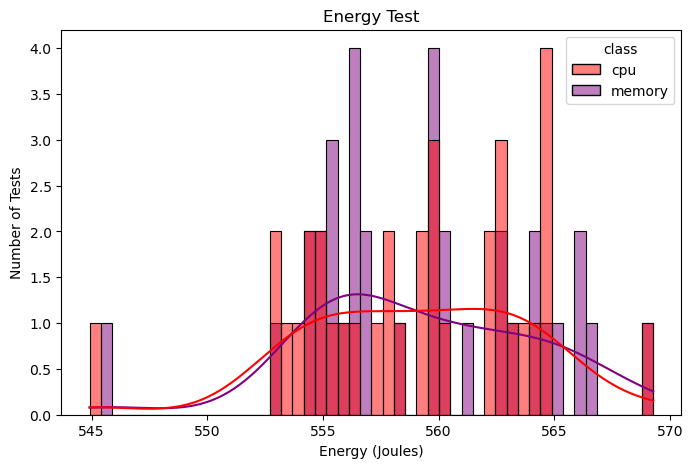

In [256]:
plt.figure(figsize=(8,5))
sns.histplot(data=dfs, x='energy', bins=50, kde=True, hue='class', palette=['red', 'purple'], alpha=0.5)
plt.title("Energy Test")
plt.xlabel("Energy (Joules)")
plt.ylabel("Number of Tests")
plt.show()


The distributions in this plot do not appear to be normally distributed. Both the cpu and memory groups show clear signs of being asymmetrical.

**Power_avg**

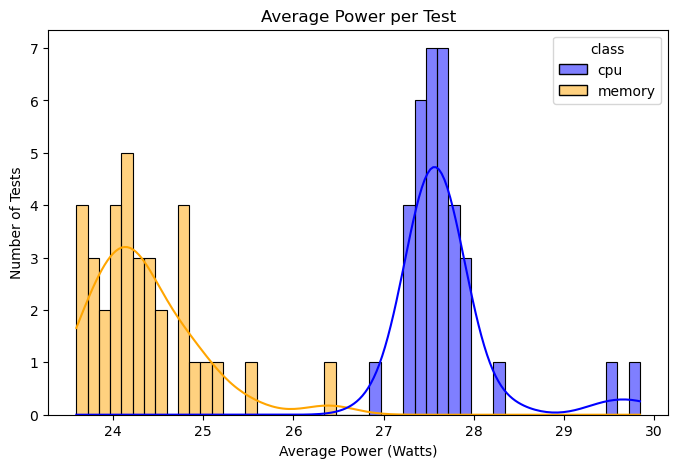

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(data=dfs, x='power_avg', bins=50, kde=True, hue='class', palette=['blue', 'orange'], alpha=0.5)
plt.title("Average Power per Test")
plt.xlabel("Average Power (Watts)")
plt.ylabel("Number of Tests")
plt.show()


Both the CPU and Memory distributions look roughly symmetrical and bell-shaped, so they might be normal distributed. To confirm this, I will run a normality test.

**Energy**

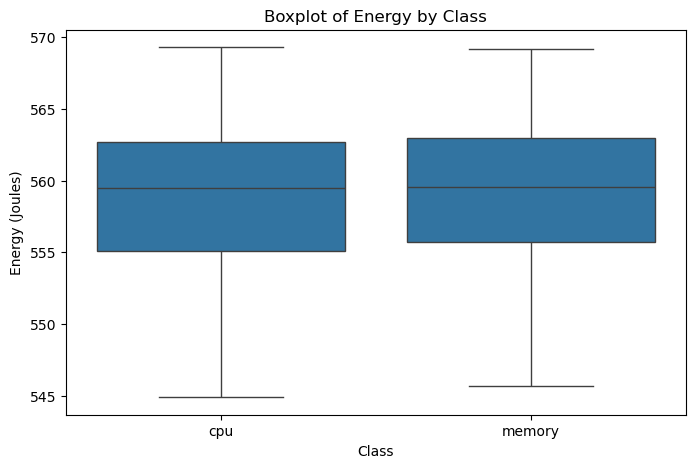

In [258]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='energy', data=dfs)
plt.title("Boxplot of Energy by Class")
plt.xlabel("Class")
plt.ylabel("Energy (Joules)")
plt.show()

The boxplots of Energy show that there are no outliers.

**Power_avg**

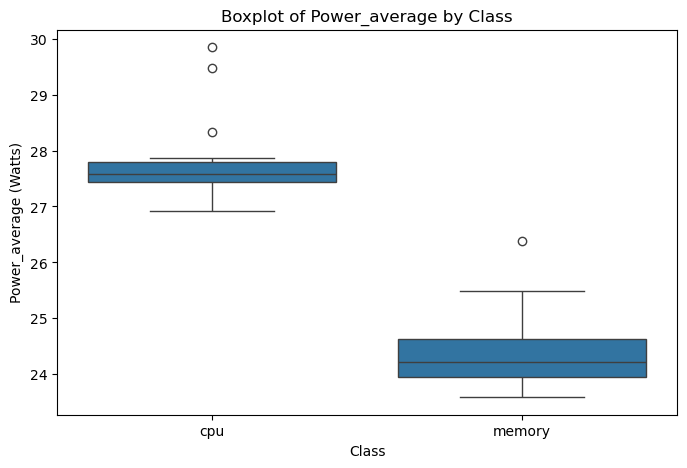

In [259]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='power_avg', data=dfs)
plt.title("Boxplot of Power_average by Class")
plt.xlabel("Class")
plt.ylabel("Power_average (Watts)")
plt.show()


The boxplots of Power_avg show that there are few outliers in the average power data.

### **Overview of df_powers**

In [260]:
df_powers.describe()

,timestamp,payload,time,ID
count,1.425150e+05,142515.000000,142515.000000,142515.000000
mean,1.761815e+12,27.945934,10.787511,35.867726
std,8.563658e+05,3.232424,6.315730,20.060134
min,1.761814e+12,5.650000,0.000000,0.000000
25%,1.761815e+12,28.470000,5.349500,18.000000
50%,1.761816e+12,28.470000,10.700000,37.000000
75%,1.761816e+12,28.470000,16.086000,53.000000
max,1.761817e+12,28.470000,23.719000,69.000000


Checking for missing values

In [261]:
df_powers.isna().sum()

timestamp    0
channel      0
action       0
payload      0
time         0
ID           0
class        0
dtype: int64

No missing values

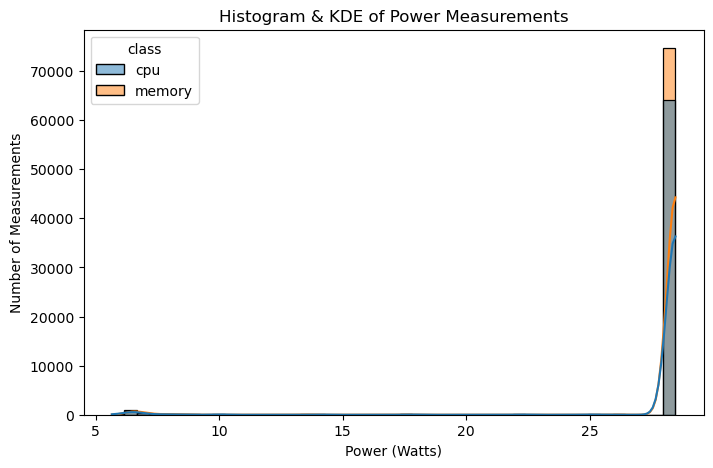

In [262]:
plt.figure(figsize=(8,5))
sns.histplot(df_powers, x='payload', hue='class', bins=45, kde=True)
plt.title("Histogram & KDE of Power Measurements")
plt.xlabel("Power (Watts)")
plt.ylabel("Number of Measurements")
plt.show()


This graph does not really show anything specific, other than that there are quite a lot of measurements, and most of them are above 25 watts.

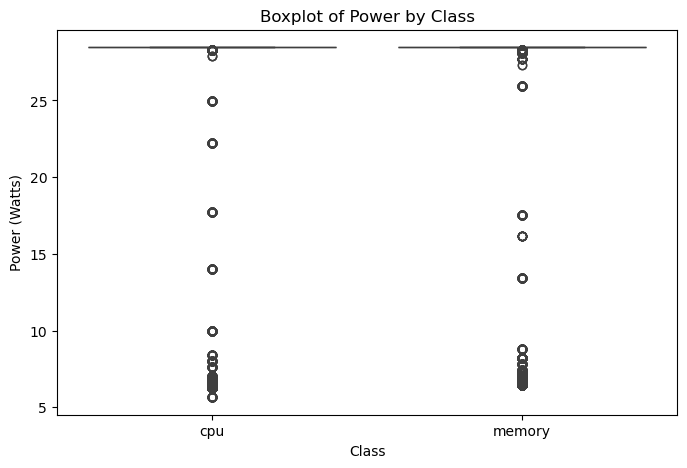

In [263]:
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='payload', data=df_powers)
plt.title("Boxplot of Power by Class")
plt.xlabel("Class")
plt.ylabel("Power (Watts)")
plt.show()


The boxplots indicate that there are many outliers in the data. 

### **Data Cleaning: Removing Outliers, Negative values and NaNs**

Then i will check for any negative values

In [264]:
for col in ['start_time', 'exp_duration', 'duration', 'energy', 'power_avg', 'ID']:
    any_negatives = (dfs[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'start_time'? False
Any negatives in 'exp_duration'? False
Any negatives in 'duration'? False
Any negatives in 'energy'? False
Any negatives in 'power_avg'? False
Any negatives in 'ID'? False


In [265]:
for col in ['timestamp', 'payload', 'time', 'ID']:
    any_negatives = (df_powers[col] < 0).any()
    print(f"Any negatives in '{col}'? {any_negatives}")

Any negatives in 'timestamp'? False
Any negatives in 'payload'? False
Any negatives in 'time'? False
Any negatives in 'ID'? False


There are none negative numbers. Now i will remove any outliers

In [266]:
# Remove outliers from the initial data (per sample) 
# use quantile outliers when we do not have normal distributed data
def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data



In [267]:
#Energy and power average did not have any outliers on the boxplot nor did it have after running the function.
dfs.loc[dfs['class'] == 'cpu', 'power_avg'] = remove_outliers_quantile(dfs.loc[dfs['class'] == 'cpu', 'power_avg'])
dfs.loc[dfs['class'] == 'memory', 'power_avg'] = remove_outliers_quantile(dfs.loc[dfs['class'] == 'memory', 'power_avg'])

#The payload had only outliers and removed all its data points, therefore I need to do something else to work on the data. Since the data is large I will aggregate power_avg by averaging over intervals.
#df_powers.loc[:,'payload'] = remove_outliers_quantile(df_powers['payload']) outcommented so no need to run the whole program again and delete some chunkedData.

number of outliers: 3 of 35 observations.
number of outliers: 1 of 35 observations.


Now the outliers are removed for power_avg, but there will probably contain some NaNs

In [268]:
missing_before = dfs.groupby('class')['power_avg'].apply(lambda x: x.isna().sum()) #AI was used here to simplify the code
print("Before:\n", missing_before)

Before:
 class
cpu       3
memory    1
Name: power_avg, dtype: int64


In [269]:
dfs = dfs.dropna() #AI was used here to simplify the code

In [270]:
missing_after = dfs.groupby('class')['power_avg'].apply(lambda x: x.isna().sum()) #AI was used here to simplify the code
print("After:\n", missing_after)

After:
 class
cpu       0
memory    0
Name: power_avg, dtype: int64


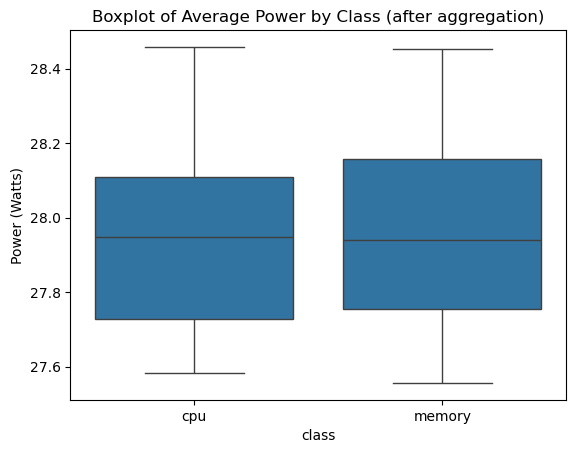

In [271]:
df_payload = df_powers.groupby(['ID','class'])['payload'].mean().reset_index() #AI was used here to aggregate payload per ID and class
sns.boxplot(x='class', y='payload', data=df_payload)
plt.title("Boxplot of Average Power by Class (after aggregation)")
plt.ylabel('Power (Watts)')
plt.show()


The boxplot tells that there are no outliers.

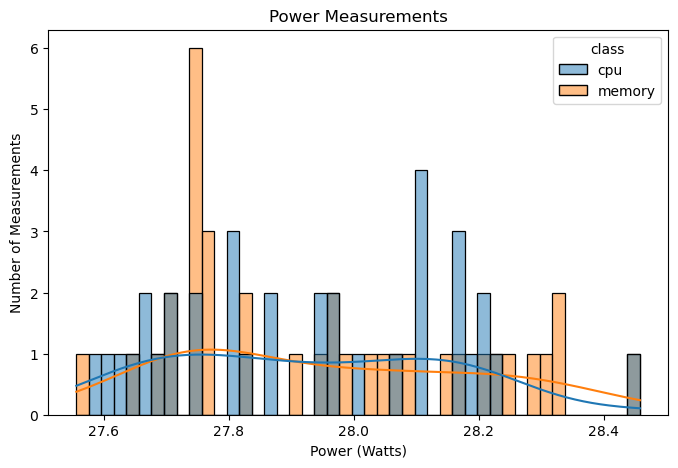

In [272]:
plt.figure(figsize=(8,5))
sns.histplot(df_payload, x='payload', hue='class', bins=45, kde=True)
plt.title("Power Measurements")
plt.xlabel("Power (Watts)")
plt.ylabel("Number of Measurements")
plt.show()


Even after aggregation, this plot does not appear to be normally distributed. Both the CPU and Memory data remain quite flat and irregular, rather than showing a bell-shaped curve.

## Using Shapiro-Wilk Test to test for normality
First i wanna use Shapiro-Wilk Test to test whether my samples have a Gaussian distribution or not.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

**For the energy**

In [273]:
# Example of the Shapiro-Wilk Normality Test
data1 = dfs[dfs['class']=='cpu']['energy']
stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.931, p=0.040
Probably not Gaussian


In [274]:
# Example of the Shapiro-Wilk Normality Test
data2 = dfs[dfs['class']=='memory']['energy']
stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.958, p=0.218
Probably Gaussian


The Shapiro–Wilk Normality Test shows that memory class for energy appears to follow a normal distribution while the cpu do not appears to be a normal distribution.

**For the average power**

In [275]:
# Example of the Shapiro-Wilk Normality Test
data3 = dfs[dfs['class']=='cpu']['power_avg']
stat, p = shapiro(data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.945, p=0.102
Probably Gaussian


In [276]:
# Example of the Shapiro-Wilk Normality Test
data4 = dfs[dfs['class']=='memory']['power_avg']
stat, p = shapiro(data4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.957, p=0.202
Probably Gaussian


The Shapiro–Wilk Normality Test shows that both the CPU and the memory data appears to follow a normal distribution.

**For the payload**

In [277]:
# Example of the Shapiro-Wilk Normality Test
data5 = df_payload[df_payload['class']=='cpu']['payload']
stat, p = shapiro(data5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.949, p=0.108
Probably Gaussian


In [278]:
# Example of the Shapiro-Wilk Normality Test
data6 = df_payload[df_payload['class']=='cpu']['payload']
stat, p = shapiro(data6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.949, p=0.108
Probably Gaussian


For the payload, both the CPU and memory in the Shapiro–Wilk Normality Test appears to follow a normal distribution.

To have further proofs, I will be also testing D’Agostino’s K^2 Test to test if the samples are normal distrubuted.

## D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions**:
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution

**For the energy**

In [279]:
# Example of the D'Agostino's K^2 Normality Test
data7 = dfs[dfs['class']=='cpu']['energy']
stat, p = normaltest(data7)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=5.316, p=0.070
Probably Gaussian


In [280]:
# Example of the D'Agostino's K^2 Normality Test
data8 = dfs[dfs['class']=='memory']['energy']
stat, p = normaltest(data8)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.658, p=0.720
Probably Gaussian


Both the CPU and memory energy data appear to follow a normal distribution.

**For the average power**

In [281]:
# Example of the D'Agostino's K^2 Normality Test
data9 = dfs[dfs['class']=='cpu']['power_avg']
stat, p = normaltest(data9)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=4.335, p=0.114
Probably Gaussian


In [282]:
# Example of the D'Agostino's K^2 Normality Test
data10 = dfs[dfs['class']=='memory']['power_avg']
stat, p = normaltest(data10)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=2.788, p=0.248
Probably Gaussian


The average power data for both the CPU and Memory does seem to follow a normal distribution.

**For the payload**

In [283]:
# Example of the D'Agostino's K^2 Normality Test
data11 = df_payload[df_payload['class']=='cpu']['payload']
stat, p = normaltest(data11)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=2.613, p=0.271
Probably Gaussian


In [284]:
# Example of the D'Agostino's K^2 Normality Test
data12 = df_payload[df_payload['class']=='memory']['payload']
stat, p = normaltest(data12)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=5.369, p=0.068
Probably Gaussian


The payload data for both the CPU and Memory is probably normally distributed.

**The graph for energy does not look normally distributed, and 3 out of 4 normality tests agreed. Therefore, I will perform a normality-based test for energy.**
 
**The graph for power_avg looks somewhat like a normal distribution, and all 4 tests indicate that it could be normally distributed. So I will proceed with a normality-based test for power_avg.**

**The graph for payload does not look normally distributed, but all 4 tests suggest that it is normal distributed. Meaning, I will trust the test results and use a normality-based test for payload.**

### **Normal distribution test**

## Lavene's test
Tests whether the observations in each sample have the same variance.

**Interpretation**
- H0: The null hypothesis of Levene’s test is that all groups have equal variances.
- H1: The alternative hypothesis of Levene’s test is that at least one pair of groups has unequal variances.

In [285]:
data13 = dfs[dfs['class']=='cpu']['energy']
data14 = dfs[dfs['class']=='memory']['energy']
stat, p_value = levene(data13, data14)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
	print('Cannot reject the null hypothesis: all groups probably have equal variances')
else:
	print('Reject the null hypothesis: at least one pair of groups has unequal variances')

Lavene's test statistic: 0.24083621905032823
P-value: 0.6252813103885744
Cannot reject the null hypothesis: all groups probably have equal variances


In [286]:
data15 = dfs[dfs['class']=='cpu']['power_avg']
data16 = dfs[dfs['class']=='memory']['power_avg']
stat, p_value = levene(data15, data16)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
	print('Cannot reject the null hypothesis: all groups probably have equal variances')
else:
	print('Reject the null hypothesis: at least one pair of groups has unequal variances')

Lavene's test statistic: 12.207139274891942
P-value: 0.0008693787297424492
Reject the null hypothesis: at least one pair of groups has unequal variances


In [287]:
data17 = df_payload[df_payload['class']=='cpu']['payload']
data18 = df_payload[df_payload['class']=='memory']['payload']
stat, p_value = levene(data17, data18)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
	print('Cannot reject the null hypothesis: all groups probably have equal variances')
else:
	print('Reject the null hypothesis: at least one pair of groups has unequal variances')

Lavene's test statistic: 0.21122708094680395
P-value: 0.6472733370951136
Cannot reject the null hypothesis: all groups probably have equal variances


# Independent t-test
To determine if the means of two independent samples are different.

## Assumptions
- Observations in each sample are independent.
- Observations in each sample are normally distributed.
- Assumed unequal variances use Welch's t-test, equal_var = False, equal variances is the default

## Interpretation
- **H₀:** the means of the two samples are equal.
- **H₁:** the means of the two samples are different.

In [288]:
stat, p = ttest_ind(dfs[dfs['class']=='cpu']['energy'], dfs[dfs['class']=='memory']['energy']) #Used AI to do a t-test on python.
print("t-statistic:", stat, "p-value:", p)
if p > 0.05:
    print("Cannot reject the null hypothesis: the means are probably equal.")
else:
    print("Reject the null hypothesis: the means are probably different.")

t-statistic: -0.31769741030093307 p-value: 0.75174872048105
Cannot reject the null hypothesis: the means are probably equal.


In [289]:
stat, p = ttest_ind(dfs[dfs['class']=='cpu']['power_avg'], dfs[dfs['class']=='memory']['power_avg'], equal_var=True) #Used AI to do a t-test on python.
print("t-statistic:", stat, "p-value:", p)
if p > 0.05:
    print("Cannot reject the null hypothesis: the means are probably equal.")
else:
    print("Reject the null hypothesis: the means are probably different.")

t-statistic: 36.03610181755183 p-value: 3.2006695946838753e-44
Reject the null hypothesis: the means are probably different.


In [290]:
stat, p = ttest_ind(df_payload[df_payload['class']=='cpu']['payload'], df_payload[df_payload['class']=='memory']['payload']) #Used AI to do a t-test on python.
print("t-statistic:", stat, "p-value:", p)
if p > 0.05:
    print("Cannot reject the null hypothesis: the means are probably equal.")
else:
    print("Reject the null hypothesis: the means are probably different.")

t-statistic: -0.49277698502524936 p-value: 0.6237576562340796
Cannot reject the null hypothesis: the means are probably equal.


# Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

**Assumptions:**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

**Interpretation**
- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

The samples are indenpendent and follow a normally distribution, and from the Levene's test, the samples may have the same variance.

In [291]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = dfs[dfs['class']=='cpu']['energy']
data2 = dfs[dfs['class']=='memory']['energy']
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.101, p=0.752
Probably the same distribution


In [292]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = dfs[dfs['class']=='cpu']['power_avg']
data2 = dfs[dfs['class']=='memory']['power_avg']
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1298.601, p=0.000
Probably different distributions


In [293]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = df_payload[df_payload['class']=='cpu']['payload']
data2 = df_payload[df_payload['class']=='memory']['payload']
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.243, p=0.624
Probably the same distribution


The results of the statistical tests show that for energy and payload cannot reject the null hypothesis, suggesting that both groups likely have equal variances.

For power_avg, the situation is different. Levene's test indicates that at least one group, i.e., cpu or memory, has unequal variances. Both the t-test and ANOVA suggest that the means and distributions differ between the groups. This implies that there are significant differences in power_avg between the different groups.

Overall, the analysis indicate that while the groups for energy and payload are relatively similar, power_avg's groups are significantly different.

##  **3. Interpretation and Discussion**

The lineplot aligns well with the experiment and show a clear pattern. There are power spikes during the active stress tests and drops during the 10-second sleep intervals. The behavior of the lineplot is consistent with the expected workload of the CPU and memory.


Even when the boxplot showing that there are outliers for energy, when trying to remove the outliers, the function did not remove any outliers.

As for data distributions, the plots for energy and payload did not seem to represent normal distributions. Energy distribution had skewness and the payload distribution was quite flat and irregular.
The distribution for power_avg did seem to appear like it was likely to represent a normal distribution. 
However, Shapiro-Wilk and D’Agostino’s K^2 tests suggested that the power_avg and payload features could be treated as normally distributed, but not the energy data.


| Feature   | Plot - Normality                     | Shapiro-Wilk (Normal?)       | D'Agostino’s K² (Normal?) |
|-----------|-------------------------------------|------------------------------|---------------------------|
| energy    | Does not look normally distributed  | 1 out of 2                   | 2 out of 2                |
| power_avg | Looks somewhat normally distributed | 2 out of 2                   | 2 out of 2                |
| payload   | Does not look normally distributed  | 2 out of 2                   | 2 out of 2                |

Lavene's test, ttest and ANOVA's test was conducted for all features, energy, power_avg and payload. 

| **Variable**   | **Levene's Test (stat, p)**                                           | **t-test (t, p)**                                      | **ANOVA (stat, p)**                     |
|----------------|-----------------------------------------------------------------------|-------------------------------------------------------|----------------------------------------|
| **energy**     | Cannot reject null: all groups probably have equal variances (stat=0.241, p=0.625) | Cannot reject null: means are probably equal (t=-0.318, p=0.752) | Probably the same distribution (stat=0.101, p=0.752) |
| **power_avg**  | Reject null: at least one pair of groups has unequal variances (stat=12.207, p=0.00087) | Reject null: means are probably different (t=36.036, p≈0) | Probably different distributions (stat=1298.601, p≈0) |
| **payload**    | Cannot reject null: all groups probably have equal variances (stat=0.211, p=0.647) | Cannot reject null: means are probably equal (t=-0.493, p=0.624) | Probably the same distribution (stat=0.243, p=0.624) |


To check whether the groups are different in energy, power, or payload, I ran Levene’s test, a t-test, and ANOVA on all three features. The feature, power_avg shows real differences, while energy and payload do not.

For energy, all tests (Levene, t-test, ANOVA) failed to reject their null hypotheses. The variance looks the same, the mean values could the same, and the data likely comes from the same distribution. In other words, none of the tested conditions led to a meaningful difference in overall energy consumption.

The results for payload are similar. There were no differences in variance or the mean, and ANOVA also showed no difference between the groups. This suggests that the size of the workload (payload) did not play a role in how much energy or power the system used in this experiment.

For power_avg, all three tests indicate a real difference between the groups. Levene’s test shows that the groups do not have the same variance, and both the t-test and ANOVA reject the null hypothesis, meaning their mean values are similar. This means the average enery consumption actually changes between the conditions, and these differences are not just random variation.



## **4. Validity:**

**Comfounding variables:**
- Small differences in temperature or how well the computer was cooled could have affected how much power the CPU or memory used. The CPU test was executed on a table while the memory test was on a bed. 
- dbus service was not disabled and might have an affect.
- Ran make measure but canceled it before a test could stop, which might have added more tests to the raw data, resulting in more chunked data.

### **4.1 Internal Validity**

Not all runs were done at the same time, so things like CPU temperature or other programs running in the background could have affected the energy measurements. Even after normalizing energy to 20 seconds, measurements can still vary due to factors such as CPU temperature (which can affect performance and power use), background processes consuming CPU or memory power, and CPU frequency scaling (meaning the CPU automatically changes its clock speed (frequency) and voltage up or down based on workload aiming to save energy).

Some hardware settings, such as screen brightness were not minimized or disabled, meaning the screen was on throughout the tests, which could have impacted the results. Additionally, the specific hardware and software used in this experiment have a influence on the outcomes. Newer hardware components and updated software (including operating systems and packages installed) tend to be more energy efficient than those that was used in this experiment.

### **4.2 External Validity**

Because of a number of limitations, it is difficult to generalize the results to real-world systems.
The tests were run on a laptop, which may not generalize well to other devices such as mobile devices, servers, or types of devices using other types of hardwares. Because the results may differ on laptops compared to mobile devices due to differences in cooling, hardware capabilities and energy usage.

The environmental factors such as ambient temperature, cooling efficiency, laptop's overall health can influence the energy measurements was not 100% controlled in this experiment, i.e. not all laptops was on the same surface and had same ambient temperature or had the newest unbroken hardwares. 

RAPL measures only the energy consumption of the CPU and memory and does not include other components such as the external GPU. This means the reported values may not reflect the laptop’s total energy usage. Stress‑ng is designed to push the system to its limits, not to mimic real-world usage, so the workload does not represent a typical everyday task. 


## **5. Reflection:**

During the project, I faced some challenges. The first challenge I struggled with was dealing with the outliers to the payload feature. I was using a function to remove the outliers, but the function returned that every data point was an outlier. I guess this happened for a few reasons, such as strict inequalities or the IQR being relatively small or perhaps even zero. Wether the reason was it or not, i ended up with using aggregation in an attempt to make use of the data. 

During using the linux laptop, my screen started to glitch every time i moved the screen and then was frozen until I reset the laptop.
Lastly, I realized I was wrong in my assumption about the energy consumption. I assumed that because the memory was always being active, it would consume less energy. However, the data indicated that it was the CPU that was consuming less energy.
